In [3]:
%matplotlib inline
import sys
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
sys.path.append('/Users/matthieule/repos/reinforcement_learning')

In [4]:
from dqn.environment import ProcessedEnvironnement
from dqn.agent import DQNAgent
from dqn.cnn import ConvNet
from dqn.history import History

Using TensorFlow backend.


# Load the environment

In [5]:
env = ProcessedEnvironnement(
    'SpaceInvaders-v0', 
    outdir='/Users/matthieule/temp/random-agent-results'
)
env.seed(0)

[2017-07-11 08:50:26,633] Making new env: SpaceInvaders-v0


# Instantiate the Network / History / Agent classes

In [6]:
weight_fname = '/Users/matthieule/temp/test.h5'
ob = env.reset()
input_shape = (84, 84, 4)

network = ConvNet(
    input_shape=input_shape, nbr_action=env.action_space.n, 
    weight_fname=weight_fname
)
history = History(
    obs_shape=(84, 84, 1), buffer_size=10
)
agent = DQNAgent(
    action_space=env.action_space, network=network,
    obs_shape=(84, 84, 1), buffer_size=1000000
)

___________________________________________________________________________________________________________________
Layer (type)                         Output Shape              Param #       Connected to                          
input_1 (InputLayer)                 (None, 84, 84, 4)         0                                                   
___________________________________________________________________________________________________________________
convolution2d_1 (Convolution2D)      (None, 20, 20, 32)        8224          input_1[0][0]                         
___________________________________________________________________________________________________________________
activation_1 (Activation)            (None, 20, 20, 32)        0             convolution2d_1[0][0]                 
___________________________________________________________________________________________________________________
convolution2d_2 (Convolution2D)      (None, 9, 9, 64)          32832    

# Run a random agent to fill the history buffer

In [7]:
reward = 0
warm_up_counter = 0
action = 0
while warm_up_counter < 5000:
    ob = env.reset()
    done = True
    while True:
        action = agent.act(
            ob, reward, done, random=True, 
            no_op_max=4, no_op_action=0
        )
        ob, reward, done, _ = env.step(action)
        warm_up_counter += 1
        if done:
            break

In [8]:
print('Size of the history: {}'.format(len(agent.history.past_obs)))
print('Shape of the input'.format(agent.history.past_obs[0].shape))

Size of the history: 5009
Shape of the input


Note the size of the history is bigger than the limit of the warm-up counter because we go to the end of an episode which was started

In [9]:
fontsize = 18
index = 2000

history_size = len(agent.history.past_obs)-1
end_episode_example = np.argmin(agent.history.past_rewards)
@interact(index=widgets.IntSlider(
    min=0, max=history_size, step=1, 
    value=end_episode_example
))
def plot_history(index):
    
    f, axs = plt.subplots(1, 1, figsize=(5, 5))

    axs.imshow(agent.history.past_obs[index][..., 0], cmap='gray')
    axs.set_title(
        'action: {} / reward: {} / done: {}'.format(
            agent.history.past_actions[index],
            agent.history.past_rewards[index],
            agent.history.past_done[index]
        ),
        fontsize=12
    )
    plt.show()

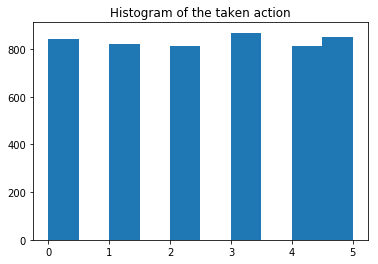

In [10]:
plt.hist(agent.history.past_actions)
plt.title('Histogram of the taken action')

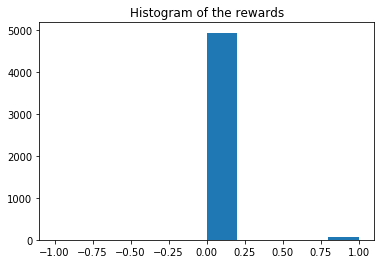

In [11]:
plt.hist(agent.history.past_rewards)
plt.title('Histogram of the rewards')

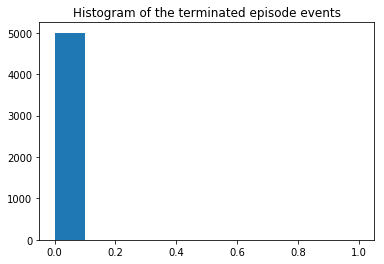

In [12]:
plt.hist(agent.history.past_done)
plt.title('Histogram of the terminated episode events')